In [90]:
import matplotlib
import pandas as pd
import seaborn as sn
import seml
from matplotlib import pyplot as plt

matplotlib.style.use("fivethirtyeight")
matplotlib.style.use("seaborn-talk")
matplotlib.rcParams['font.family'] = "monospace"
plt.rcParams['savefig.facecolor'] = 'white'
sn.set_context("poster")

In [91]:
results = seml.get_results(
    "cpa_transf",
    to_data_frame=True,
    fields=["config", "result", "seml", "config_hash"],
    states=["COMPLETED"],
    filter_dict={"batch_id": 39}
)

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

/home/simon/miniconda3/envs/chemical_CPA/lib/python3.7/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [92]:
results

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,seml.temp_dir,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.patience,config.model.additional_params.seed,config.model.embedding.directory,config.model.embedding.model,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.step_size_lr,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.elapsed_time_min,result.training,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs
0,169,57aeb6f79610117cb136cc708fd0f664,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemical_CPA/sweeps/logs,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemical_CPA,"[[compert/seml_sweep_icb.py, 61d3e62554ad8628555537e4], [compert/train.py, 61d3e62554ad8628555537e6], [compert/model.py, 61d3e62554ad8628555537e8], [compert/data.py, 61d3e62554ad8628555537ea], [co...",/mnt/home/icb/simon.boehm/Masters_thesis/chemical_CPA/sweeps/logs/chemical_CPA_lincs_4295395_0.out,"python compert/seml_sweep_icb.py with 'model={'""'""'additional_params'""'""': {'""'""'seed'""'""': 1337, '""'""'patience'""'""': 3, '""'""'decoder_activation'""'""': '""'""'linear'""'""', '""'""'doser_type'""'""': '""'""'...",/tmp/a5169ec5-7859-41c0-abba-96145f664325,169,cpa_transf,cell_id,/storage/groups/ml01/projects/2021_chemicalCPA_leon.hetzel/datasets/lincs_full_smiles.h5ad,pert_dose,cov_drug_dose_name,pert_id,canonical_smiles,random_split,True,lincs,linear,amortized,3,1337,None,grover_base,2,0.000056,4,0.000013,128,3,0.000561,1.329292e-07,256,128,128,3,0.000561,1.329292e-07,128,0.187270,4,512,0.132929,0.314891,100,./,False,25,False,600,1500,True,True,sweeps/checkpoints/lincs_test_sweeps,872962247,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 5...",[400],"[4941.8776537925005, 1173.8481296896935, 777.1150463186204, 610.6329094953835, 510.38385159661993, 429.7742129073158, 369.14493253148976, 312.44037213323463, 266.37641630753933, 226.8493256099573,...","[54687.14895820618, 53523.51205635071, 52638.45876789093, 51987.79001331329, 51621.254444122314, 51433.88802719116, 51190.58833694458, 51112.90743160248, 50965.95840072632, 

# Looking at the results
Which things are we interested in?
- Which were the best 3 runs? Print their configurations
- Maybe print embeddings against each other
- Print all the loss curves during reconstruction

In [93]:
sweeped_cols = [
    "model.hparams.dropout",
    "model.hparams.dim",
    "model.hparams.dosers_width",
    "model.hparams.dosers_depth",
    "model.hparams.dosers_lr",
    "model.hparams.dosers_wd",
    "model.hparams.autoencoder_width",
    "model.hparams.autoencoder_depth",
    "model.hparams.autoencoder_lr",
    "model.hparams.autoencoder_wd",
    "model.hparams.adversary_width",
    "model.hparams.adversary_depth",
    "model.hparams.adversary_lr",
    "model.hparams.adversary_wd",
    "model.hparams.adversary_steps",
    "model.hparams.reg_adversary",
    "model.hparams.penalty_adversary",
    "model.hparams.batch_size",
    "model.hparams.step_size_lr",
    "model.hparams.embedding_encoder_width",
    "model.hparams.embedding_encoder_depth",
    "model.embedding.model"
]

In [94]:
# percentage of training runs that resulted in NaNs
import math

nan_results = results[results["result.loss_reconstruction"].apply(lambda x: math.isnan(sum(x)))]
results_clean = results[~results["result.loss_reconstruction"].apply(lambda x: math.isnan(sum(x)))].copy()
print(len(nan_results) / len(results))

0.25


In [95]:
nan_results["config.model.embedding.model"].value_counts()

rdkit    20
Name: config.model.embedding.model, dtype: int64

In [96]:
results_clean["config.model.embedding.model"].value_counts()

grover_base    20
MPNN           20
weave          20
Name: config.model.embedding.model, dtype: int64

## Goals
What are we most interested in:
- Maybe a plot over all embeddings. Which ones performed best?
- Is the adversarial loss in the right ballpark?
- Which ones where the best hyperparameters?

In [97]:
results_clean["result.test_agg_mean"] = results_clean["result.test"].apply(lambda x: sum(x[0]) / len(x[0]))
results_clean["result.test_mean_de"] = results_clean["result.test"].apply(lambda x:x[0][1])
results_clean["result.ood_agg_mean"] = results_clean["result.ood"].apply(lambda x: sum(x[0]) / len(x[0]))
results_clean["result.ood_mean_de"] = results_clean["result.ood"].apply(lambda x:x[0][1])
results_clean["result.training_agg_mean"] = results_clean["result.training"].apply(lambda x: sum(x[0]) / len(x[0]))
results_clean["result.training_mean_de"] = results_clean["result.training"].apply(lambda x:x[0][1])
results_clean["result.perturbation disentanglement"] = results_clean["result.perturbation disentanglement"].apply(lambda x: x[0])
results_clean

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,seml.temp_dir,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.patience,config.model.additional_params.seed,config.model.embedding.directory,config.model.embedding.model,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.step_size_lr,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.elapsed_time_min,result.training,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs,result.test_agg_mean,result.test_mean_de,result.ood_agg_mean,result.ood_mean_de,result.training_agg_mean,result.training_mean_de
0,169,57aeb6f79610117cb136cc708fd0f664,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemical_CPA/sweeps/logs,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemical_CPA,"[[compert/seml_sweep_icb.py, 61d3e62554ad8628555537e4], [compert/train.py, 61d3e62554ad8628555537e6], [compert/model.py, 61d3e62554ad8628555537e8], [compert/data.py, 61d3e62554ad8628555537ea], [co...",/mnt/home/icb/simon.boehm/Masters_thesis/chemical_CPA/sweeps/logs/chemical_CPA_lincs_4295395_0.out,"python compert/seml_sweep_icb.py with 'model={'""'""'additional_params'""'""': {'""'""'seed'""'""': 1337, '""'""'patience'""'""': 3, '""'""'decoder_activation'""'""': '""'""'linear'""'""', '""'""'doser_type'""'""': '""'""'...",/tmp/a5169ec5-7859-41c0-abba-96145f664325,169,cpa_transf,cell_id,/storage/groups/ml01/projects/2021_chemicalCPA_leon.hetzel/datasets/lincs_full_smiles.h5ad,pert_dose,cov_drug_dose_name,pert_id,canonical_smiles,random_split,True,lincs,linear,amortized,3,1337,None,grover_base,2,0.000056,4,0.000013,128,3,0.000561,1.329292e-07,256,128,128,3,0.000561,1.329292e-07,128,0.187270,4,512,0.132929,0.314891,100,./,False,25,False,600,1500,True,True,sweeps/checkpoints/lincs_test_sweeps,872962247,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 5...",[400],"[4941.8776537925005, 1173.8481296896935, 777.1150463186204, 610.6329094953835, 510.38385159661993, 429.7742129073158, 369.14493253148976, 312.44037213323463, 266.37641630753933, 226.8493256099573,...","[54687.14895820618, 53523.51205635071, 52638

Text(0.5, 1.0, 'Total epochs before final stopping (min 125)')

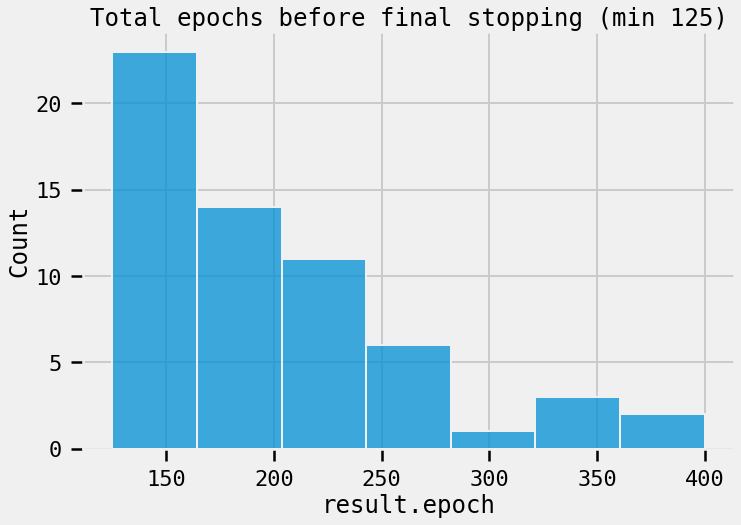

In [98]:
ax = sn.histplot(data=results_clean["result.epoch"].apply(max))
ax.set_title("Total epochs before final stopping (min 125)")

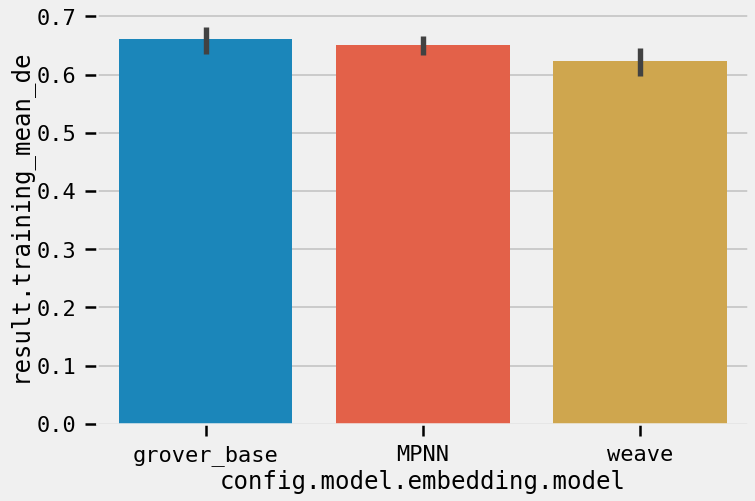

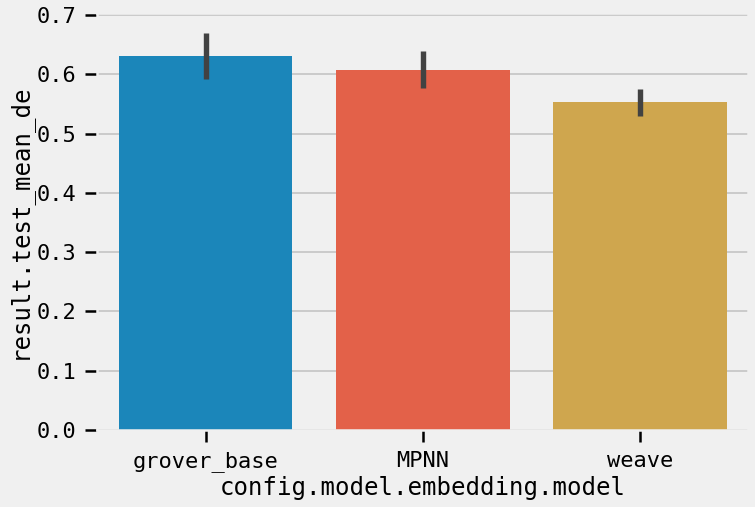

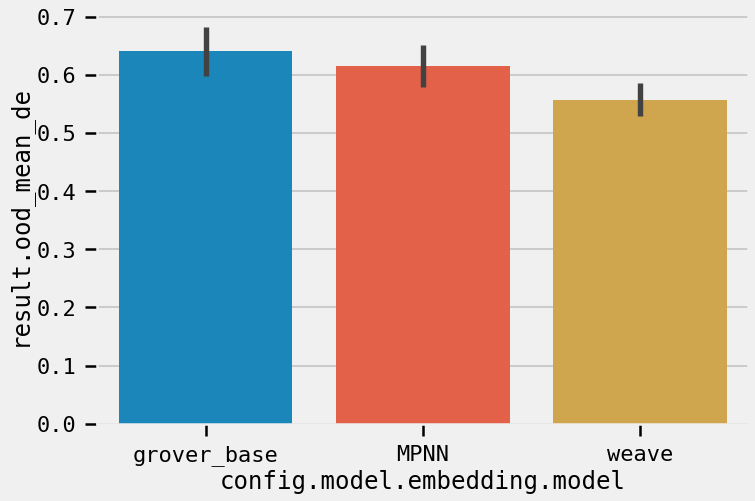

In [99]:
for y in ("result.training_mean_de", "result.test_mean_de", "result.ood_mean_de"):
    sn.barplot(data=results_clean, x="config.model.embedding.model", y=y)
    plt.show()

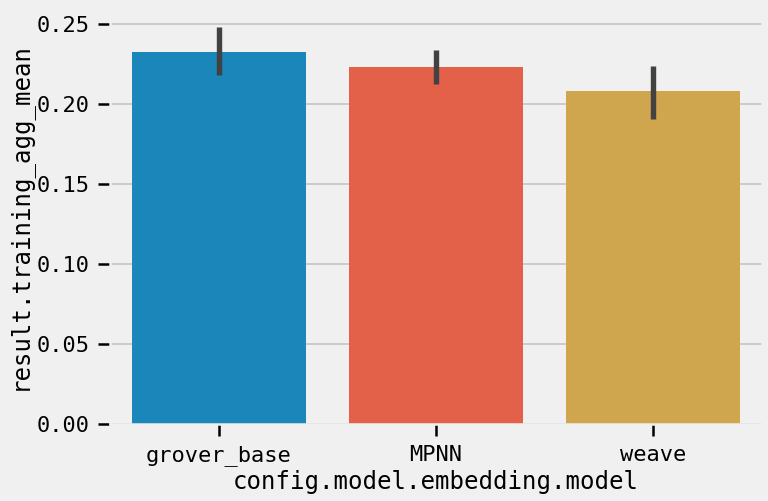

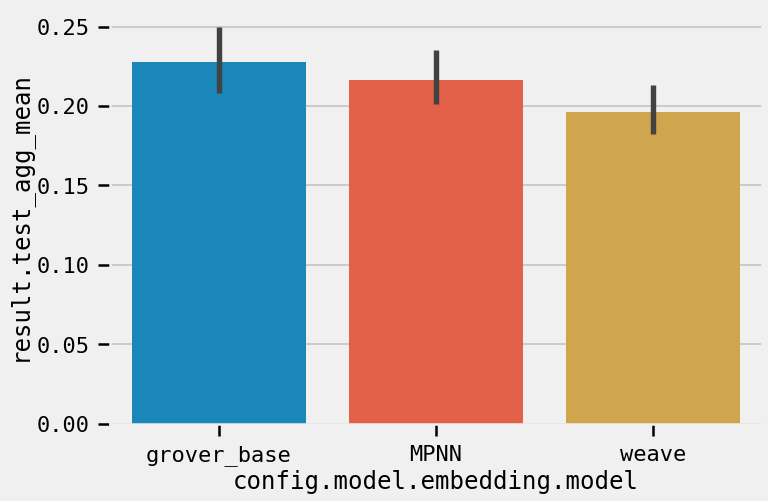

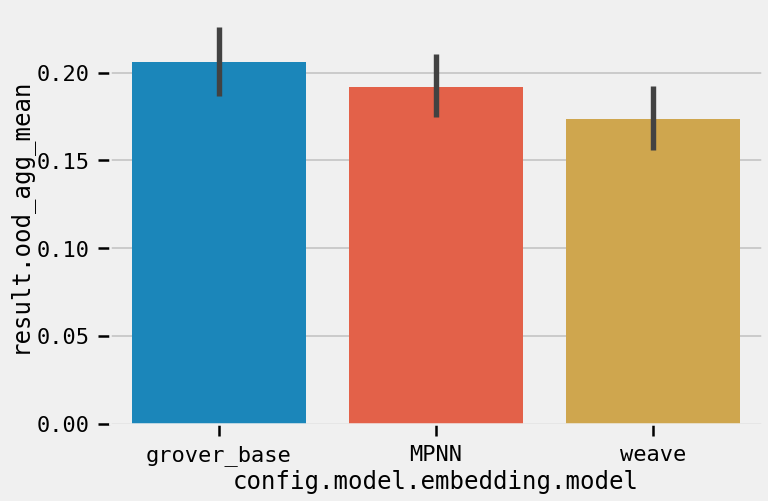

In [100]:
for y in ("result.training_agg_mean", "result.test_agg_mean", "result.ood_agg_mean"):
    sn.barplot(data=results_clean, x="config.model.embedding.model", y=y)
    plt.show()

In [101]:
best_3 = []
for embedding in list(results_clean["config.model.embedding.model"].unique()):
    print(embedding)
    df = results_clean[results_clean["config.model.embedding.model"] == embedding]
    best_3.append(
        df.sort_values(by="result.ood_agg_mean", ascending=False)[["config." + col for col in sweeped_cols]].head(2))

best_3 = pd.concat(best_3)
best_3

grover_base
MPNN
weave


,config.model.hparams.dropout,config.model.hparams.dim,config.model.hparams.dosers_width,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.autoencoder_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.adversary_width,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_wd,config.model.hparams.adversary_steps,config.model.hparams.reg_adversary,config.model.hparams.penalty_adversary,config.model.hparams.batch_size,config.model.hparams.step_size_lr,config.model.hparams.embedding_encoder_width,config.model.hparams.embedding_encoder_depth,config.model.embedding.model
17,0.262378,64,256,1,0.001121,3.752056e-07,256,4,0.001121,3.752056e-07,128,3,0.000112,0.000038,2,1.256104,0.375206,128,50,512,2,grover_base
9,0.354036,256,256,2,0.002607,1.331122e-06,256,5,0.002607,1.331122e-06,64,3,0.000261,0.000133,2,6.796578,1.331122,512,100,512,3,grover_base
29,0.354036,256,256,2,0.002607,1.331122e-06,256,5,0.002607,1.331122e-06,64,3,0.000261,0.000133,2,6.796578,1.331122,512,100,512,3,MPNN
37,0.262378,64,256,1,0.001121,3.752056e-07,256,4,0.001121,3.752056e-07,128,3,0.000112,0.000038,2,1.256104,0.375206,128,50,512,2,MPNN
77,0.262378,64,256,1,0.001121,3.752056e-07,256,4,0.001121,3.752056e-07,128,3,0.000112,0.000038,2,1.256104,0.375206,128,50,512,2,weave
63,0.299329,64,512,2,0.001575,6.251374e-07,512,5,0.001575,6.251374e-07,256,2,0.000158,0.000063,3,2.481041,0.625137,512,200,256,4,weave


In [25]:
best_parameters = results_clean.sort_values(by="result.ood_agg_mean", ascending=False).head(1)
best_parameters

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,...,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs,result.test_agg_mean,result.ood_agg_mean,result.training_agg_mean
17,186,51b6522a7bb27c992425518989beddf5,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/seml_sweep_icb.py, 61d3e62554ad86285...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,"[[0.9052050431569417, 0.7648142655690511, -0.0...","[[0.9076691546610424, 0.7781472940530095, -0.1...",[0.44316503405570984],[5.6258790436005626e-05],[[0.9619196653366089]],[[0.012195121951219513]],350,0.334371,0.315948,0.297287


In [36]:
from pprint import pprint

pprint(best_parameters.iloc[0][["config." + col for col in sweeped_cols]])

config.model.hparams.dropout                       0.262378
config.model.hparams.dim                                 64
config.model.hparams.dosers_width                       256
config.model.hparams.dosers_depth                         1
config.model.hparams.dosers_lr                     0.001121
config.model.hparams.dosers_wd                          0.0
config.model.hparams.autoencoder_width                  256
config.model.hparams.autoencoder_depth                    4
config.model.hparams.autoencoder_lr                0.001121
config.model.hparams.autoencoder_wd                     0.0
config.model.hparams.adversary_width                    128
config.model.hparams.adversary_depth                      3
config.model.hparams.adversary_lr                  0.000112
config.model.hparams.adversary_wd                  0.000038
config.model.hparams.adversary_steps                      2
config.model.hparams.reg_adversary                 1.256104
config.model.hparams.penalty_adversary  

## Checking the Adversarial losses

In [44]:
best_parameters[[key for key in best_parameters.columns if "adv" in key]]

,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates
17,3,0.000112,2,0.000038,128,0.375206,1.256104,"[53710.52596473694, 50774.028487205505, 49832.48219680786, 49562.056139945984, 49441.64699745178, 49339.46009731293, 49276.03688621521, 49226.680644989014, 49187.671931266785, 49153.65125656128, 4...","[20265.261770248413, 17596.911943674088, 17155.275956869125, 17004.369993925095, 16937.065670728683, 16923.09691286087, 16891.162095546722, 16853.998838186264, 16836.88677930832, 16828.98071265220...","[594.4454278549035, 0.018373408066054253, 0.030482925947126205, 0.03914768673666913, 0.04646468518785696, 0.06049052800517529, 0.08375559114210773, 0.10343103826926381, 0.12251722798100673, 0.1895...","[223.30983737669885, 13.729681698954664, 3.0557038296828978, 1.5863132067606784, 1.3907400539610535, 1.5941591389710084, 1.6397879834112246, 1.8552801281621214, 1.9787067204597406, 1.7374114547856..."


<AxesSubplot:xlabel='result.epoch', ylabel='result.penalty_adv_drugs'>

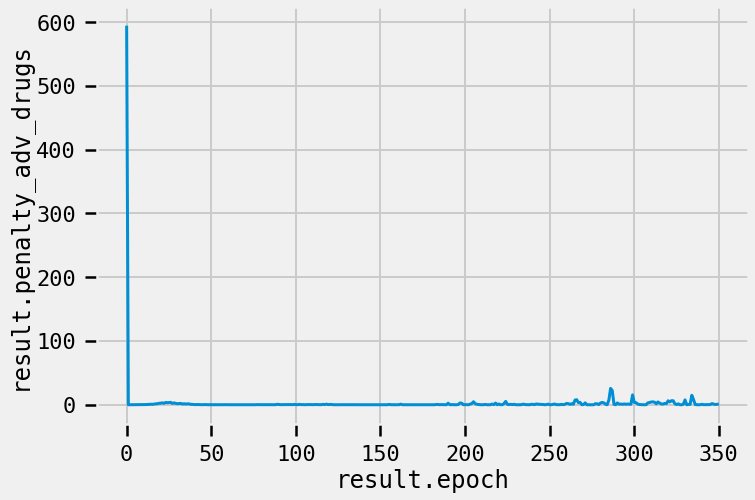

In [65]:
data_exploded = best_parameters.explode(["result.penalty_adv_drugs", "result.epoch"]).astype(
    {"result.penalty_adv_drugs": float, "result.epoch": int})[["result.penalty_adv_drugs", "result.epoch"]].reset_index()
sn.lineplot(data=data_exploded,
            x="result.epoch", y="result.penalty_adv_drugs")

<AxesSubplot:xlabel='config.model.embedding.model', ylabel='result.perturbation disentanglement'>

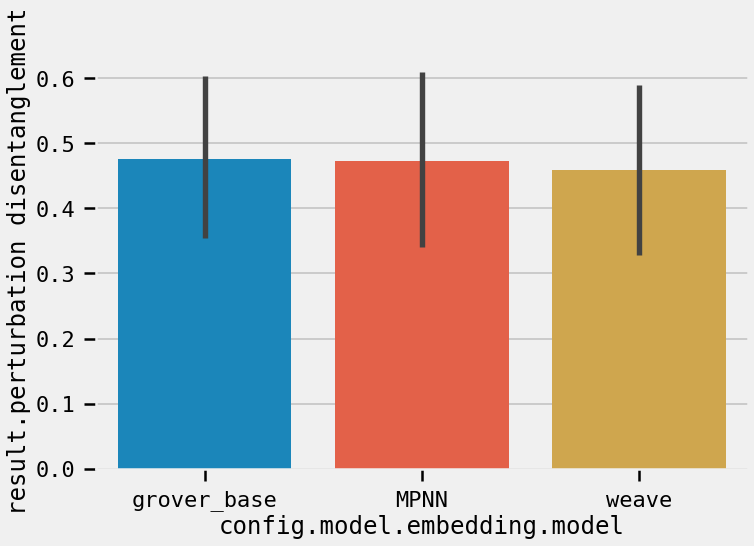

In [77]:
sn.barplot(data=results_clean, x="config.model.embedding.model", y="result.perturbation disentanglement")